<a href="https://colab.research.google.com/github/Rsoni94/Coronavirus_Sentiment_Anlysis_Project/blob/main/Corona_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB

from warnings import filterwarnings
filterwarnings("ignore")


In [2]:
df=pd.read_csv("/content/drive/MyDrive/Corona Virus Stentiment Analysis Project/Coronavirus Tweets.csv",encoding="latin1")

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df.shape

(41157, 6)

In [5]:
duplicates = df[df.duplicated()]
len(duplicates)

0

In [6]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [7]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns=['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'Count')

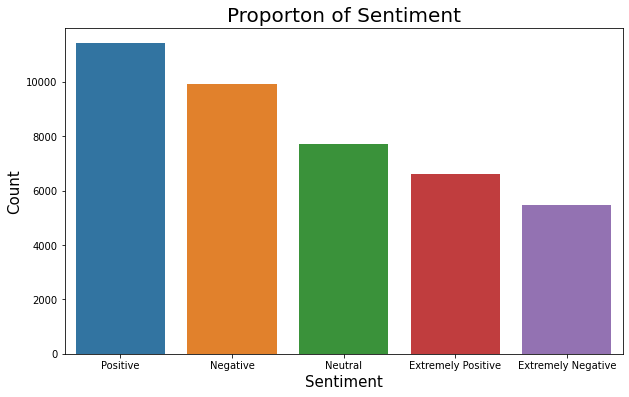

In [8]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="Sentiment", y= 'count', data=sentiment_count)
ax.set_title('Proporton of Sentiment', fontsize=20)
ax.set_xlabel("Sentiment",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

In [9]:
df.drop(df[df.Sentiment == "Neutral"].index, inplace = True)

df.Sentiment.unique()

array(['Positive', 'Extremely Negative', 'Negative', 'Extremely Positive'],
      dtype=object)

In [10]:
# Aggregate extremely positive/negative values
df = df.replace("Extremely Positive", "Positive")
df = df.replace("Extremely Negative", "Negative")

df.Sentiment.unique()

array(['Positive', 'Negative'], dtype=object)

<AxesSubplot:xlabel='Sentiment'>

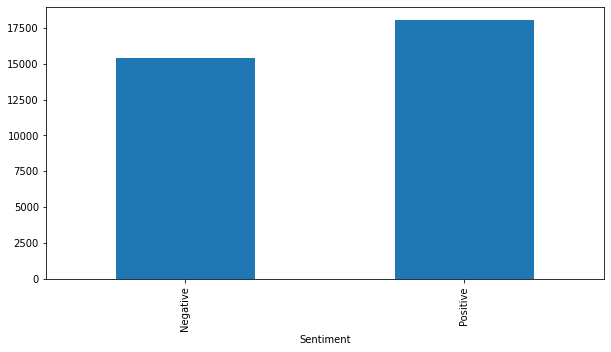

In [11]:
counts = df.groupby("Sentiment")["Sentiment"].agg("count")
fig, ax = plt.subplots(figsize=(10,5))

counts.plot.bar()

In [12]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive


In [13]:
# count number of words per headline. strip whitespaces at the beginning/end of the sentence 
# and tokenize by whitespace
df_select = df[["OriginalTweet", "Sentiment"]]
df_select["word_count"] = df_select["OriginalTweet"].apply(lambda x: len(x.strip().split(" ")))
df_select.head()


,OriginalTweet,Sentiment,word_count
1,advice Talk to your neighbours family to excha...,Positive,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,14
3,My food stock is not the only one which is emp...,Positive,40
4,"Me, ready to go at supermarket during the #COV...",Negative,38
5,As news of the regionÂs first confirmed COVID...,Positive,36


In [14]:
df_select["word_count"].describe()

count    33444.000000
mean        31.979398
std         11.044458
min          1.000000
25%         24.000000
50%         33.000000
75%         41.000000
max        127.000000
Name: word_count, dtype: float64

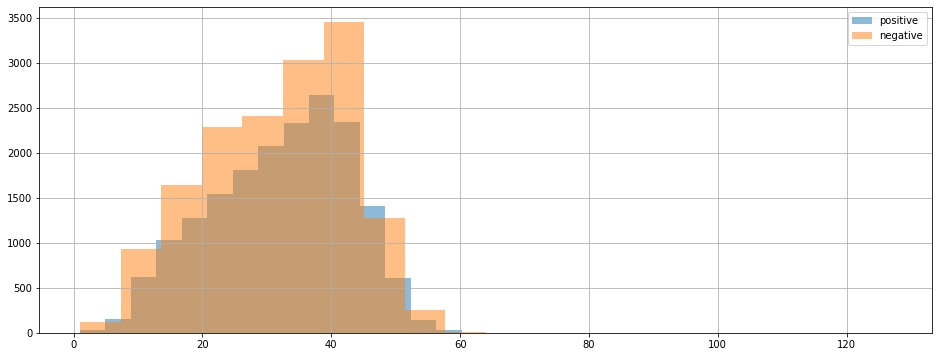

In [15]:
pos = df_select[df_select.Sentiment == "Positive"].word_count
neg =  df_select[df_select.Sentiment == "Negative"].word_count
plt.figure(figsize=(16,6))
plt.grid()


plt.hist(pos, bins = 20, alpha = 0.5, label='positive')
plt.hist(neg, bins = 20, alpha = 0.5, label='negative')
plt.legend(loc='upper right')
plt.show()

In [16]:
df_select

,OriginalTweet,Sentiment,word_count
1,advice Talk to your neighbours family to excha...,Positive,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,14
3,My food stock is not the only one which is emp...,Positive,40
4,"Me, ready to go at supermarket during the #COV...",Negative,38
5,As news of the regionÂs first confirmed COVID...,Positive,36
...,...,...,...
41150,I never that weÂd be in a situation &amp; wor...,Positive,34
41151,@MrSilverScott you are definitely my man. I fe...,Positive,48
41153,Response to complaint not provided citing COVI...,Negative,23
41154,You know itÂs getting tough when @KameronWild...,Positive,19


In [17]:
# save dataset
df_select.to_csv("./df_data.csv",index = False, encoding = "utf-8")

In [18]:
df = pd.read_csv("./df_data.csv")

In [19]:
df

,OriginalTweet,Sentiment,word_count
0,advice Talk to your neighbours family to excha...,Positive,38
1,Coronavirus Australia: Woolworths to give elde...,Positive,14
2,My food stock is not the only one which is emp...,Positive,40
3,"Me, ready to go at supermarket during the #COV...",Negative,38
4,As news of the regionÂs first confirmed COVID...,Positive,36
...,...,...,...
33439,I never that weÂd be in a situation &amp; wor...,Positive,34
33440,@MrSilverScott you are definitely my man. I fe...,Positive,48
33441,Response to complaint not provided citing COVI...,Negative,23
33442,You know itÂs getting tough when @KameronWild...,Positive,19


In [20]:
text = df.OriginalTweet.iloc[4]
text

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

In [21]:
def preprocessor(text):
    # convert to lowercase, susbstitute non alphanumerical characters with whitespaces
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [22]:
# preprocess entire corpus
df['tweet_clean'] = df['OriginalTweet'].apply(preprocessor)
df.head()

,OriginalTweet,Sentiment,word_count,tweet_clean
0,advice Talk to your neighbours family to excha...,Positive,38,advice talk to your neighbours family to excha...
1,Coronavirus Australia: Woolworths to give elde...,Positive,14,coronavirus australia woolworths to give elder...
2,My food stock is not the only one which is emp...,Positive,40,my food stock is not the only one which is emp...
3,"Me, ready to go at supermarket during the #COV...",Negative,38,me ready to go at supermarket during the covid...
4,As news of the regionÂs first confirmed COVID...,Positive,36,as news of the regionâ s first confirmed covid...


In [23]:
df.drop(["OriginalTweet"], axis=1, inplace = True)

In [24]:
df

,Sentiment,word_count,tweet_clean
0,Positive,38,advice talk to your neighbours family to excha...
1,Positive,14,coronavirus australia woolworths to give elder...
2,Positive,40,my food stock is not the only one which is emp...
3,Negative,38,me ready to go at supermarket during the covid...
4,Positive,36,as news of the regionâ s first confirmed covid...
...,...,...,...
33439,Positive,34,i never that weâ d be in a situation amp world...
33440,Positive,48,mrsilverscott you are definitely my man i fee...
33441,Negative,23,response to complaint not provided citing covi...
33442,Positive,19,you know itâ s getting tough when kameronwilds...


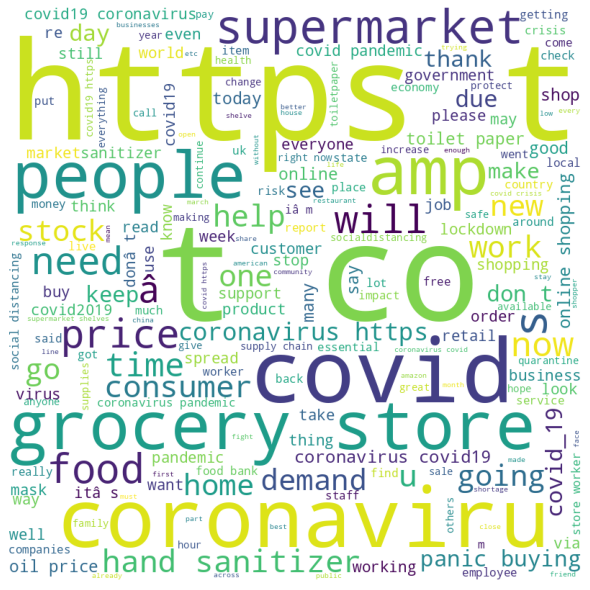

In [25]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df.tweet_clean:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [26]:
def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in stopwords]

  # joining the list of words with space separator 
  return " ".join(text)

In [27]:
df['tweet_clean'] = df['tweet_clean'].apply(remove_stopwords)

In [28]:
df.head()

,Sentiment,word_count,tweet_clean
0,Positive,38,advice talk neighbours family exchange phone n...
1,Positive,14,coronavirus australia woolworths give elderly ...
2,Positive,40,food stock one empty please don t panic will e...
3,Negative,38,ready go supermarket covid19 outbreak m parano...
4,Positive,36,news regionâ s first confirmed covid 19 case c...


In [29]:
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [30]:
df['tweet_clean']= df['tweet_clean'].apply(stemming)

In [31]:
df.head()

,Sentiment,word_count,tweet_clean
0,Positive,38,advic talk neighbour famili exchang phone numb...
1,Positive,14,coronavirus australia woolworth give elder dis...
2,Positive,40,food stock one empti pleas don t panic will en...
3,Negative,38,readi go supermarket covid19 outbreak m parano...
4,Positive,36,news regionâ s first confirm covid 19 case cam...


In [32]:
## defining Independent variable
X = df.tweet_clean

## defining dependent variable
y = df.Sentiment
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26755,), (26755,), (6689,), (6689,))

# MODEL 1-LOGISTIC REGRESSION

In [33]:
tvec = TfidfVectorizer()
LR = LogisticRegression(solver='lbfgs', max_iter = 10000)

In [34]:
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tvec),('classifier',LR)])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [35]:
## model prediction
y_pred = model.predict(X_test)

In [36]:
print('Accuracy :' ,accuracy_score(y_pred,y_test))
print('Precision :', precision_score(y_pred,y_test, average='weighted'))
print('Recall :', recall_score(y_pred,y_test, average='weighted'))

Accuracy : 0.8502018238899686
Precision : 0.8507837115255407
Recall : 0.8502018238899686


# RANDOM FOREST CLASSIFIER

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model2 = Pipeline([('vectorizer',tvec),('classifier',rf)])
model2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [38]:
y_pred_rf = model2.predict(X_test)

In [39]:
print('Accuracy :' ,accuracy_score(y_pred_rf,y_test))
print('Precision :', precision_score(y_pred_rf,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_rf,y_test, average='weighted'))

Accuracy : 0.8087905516519659
Precision : 0.8106737600844135
Recall : 0.8087905516519659


# SUPPORT VECTOR MACHINE

In [40]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

model3 = Pipeline([('vectorizer',tvec),('classifier',sgd_clf)])
model3.fit(X_train,y_train)
y_pred_sgd = model3.predict(X_test)

In [41]:
print('Accuracy :' ,accuracy_score(y_pred_sgd,y_test))
print('Precision :', precision_score(y_pred_sgd,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_sgd,y_test, average='weighted'))

Accuracy : 0.8461653460905965
Precision : 0.8467884755189035
Recall : 0.8461653460905965


In [46]:
from sklearn.svm import SVC

svc = SVC()

model4 = Pipeline([('vectorizer',tvec),('classifier',svc)])
model4.fit(X_train,y_train)



In [47]:
y_pred_svc = model4.predict(X_test)

In [48]:
print('Accuracy :' ,accuracy_score(y_pred_svc,y_test))
print('Precision :', precision_score(y_pred_svc,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_svc,y_test, average='weighted'))

Accuracy : 0.8545373000448497
Precision : 0.8548868411466071
Recall : 0.8545373000448497
